In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import sys
import numpy as np
from tensorflow.keras.utils import to_categorical

In [8]:
#Cargar datos de entrenamiento
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros
# Cargar etiquetas de los datos de entrenamiento
training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)

In [9]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [10]:
# 1. Definir el codificador
input_img = layers.Input(shape=(100, 100, 1))

In [11]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

2025-03-03 11:08:06.254558: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# 2. Definir el decodificador
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [13]:
# 3. Crear el modelo Autoencoder
autoencoder = Model(input_img, decoded)

In [14]:
# 4. Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
# 6. Entrenar el modelo (con datos de entrenamiento)
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - loss: -731242816.0000 - val_loss: -803284288.0000
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: -829592320.0000 - val_loss: -911186816.0000
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - loss: -941351616.0000 - val_loss: -1030684736.0000
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - loss: -1063967232.0000 - val_loss: -1162663296.0000
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: -1198903040.0000 - val_loss: -1308071936.0000
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - loss: -1348910336.0000 - val_loss: -1467973760.0000
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: -1515564032.0000 - val_loss: -1643397888.0000
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - loss: -1693133440.0000 - val_loss: -1835375232.0000
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: -1892859648.0000 - val_loss: -2045182336.0000
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: -2102840064.0000 - val_loss: -

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Predecir las imágenes reconstruidas
reconstructed_images = autoencoder.predict(x_test)

154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step


In [27]:
# 2. Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(x_test.flatten(), reconstructed_images.flatten())
print(f"MSE: {mse}")


MSE: 9.59349250793457


In [28]:
# 3. Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(x_test.flatten(), reconstructed_images.flatten())
print(f"MAE: {mae}")

MAE: 1.9600049257278442


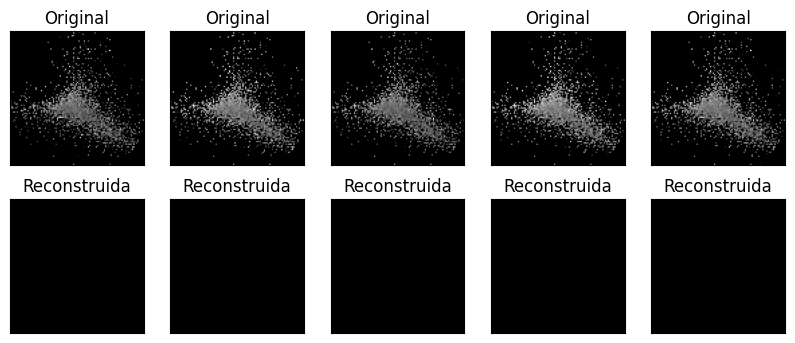

In [29]:
# 5. Visualizar algunas imágenes reconstruidas (opcional)
import matplotlib.pyplot as plt

n = 5  # Número de imágenes a mostrar
plt.figure(figsize=(10, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(100, 100), cmap="gray") #cambiar reshape si es necesario
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(100, 100), cmap="gray") #cambiar reshape si es necesario
    plt.title("Reconstruida")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

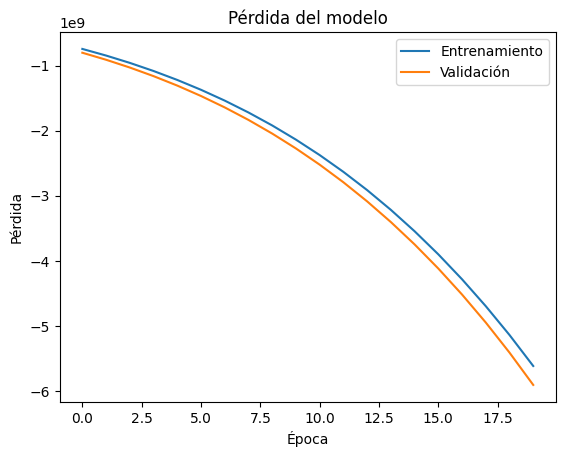

In [30]:
import matplotlib.pyplot as plt

# Asumiendo que 'history' es el objeto devuelto por autoencoder.fit()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

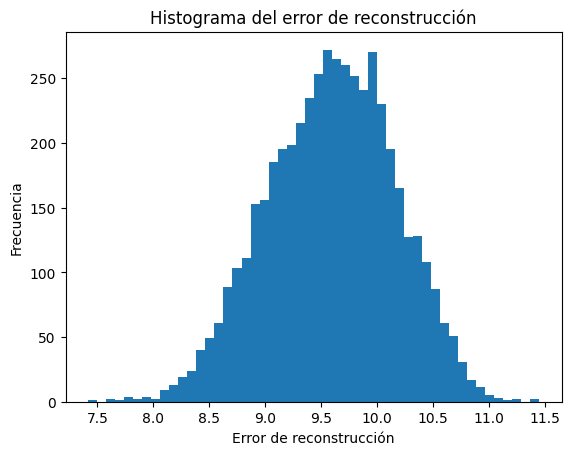

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que 'reconstructed_images' son las imágenes reconstruidas
# y 'x_test' son las imágenes originales
errors = np.mean(np.square(x_test - reconstructed_images), axis=(1, 2, 3)) # Calcula el error promedio por imagen
plt.hist(errors, bins=50)
plt.title('Histograma del error de reconstrucción')
plt.xlabel('Error de reconstrucción')
plt.ylabel('Frecuencia')
plt.show()

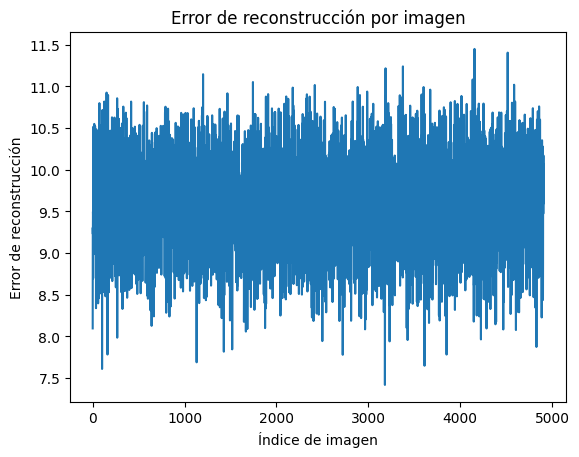

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que 'reconstructed_images' son las imágenes reconstruidas
# y 'x_test' son las imágenes originales
errors = np.mean(np.square(x_test - reconstructed_images), axis=(1, 2, 3)) # Calcula el error promedio por imagen
plt.plot(errors)
plt.title('Error de reconstrucción por imagen')
plt.xlabel('Índice de imagen')
plt.ylabel('Error de reconstrucción')
plt.show()

In [34]:
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio

# Asumiendo que 'reconstructed_images' son las imágenes reconstruidas
# y 'x_test' son las imágenes originales
psnr_values = [peak_signal_noise_ratio(x_test[i], reconstructed_images[i]) for i in range(len(x_test))]
plt.plot(psnr_values)
plt.title('PSNR por imagen')
plt.xlabel('Índice de imagen')
plt.ylabel('PSNR')
plt.show()

ValueError: image_true has intensity values outside the range expected for its data type. Please manually specify the data_range.